# 資料預處理

In [1]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from util.my_plot import plot_single, plot_batch, show_train_history, plot_images_labels_prediction, plot_image, plot_value_array


Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 4s 1us/step


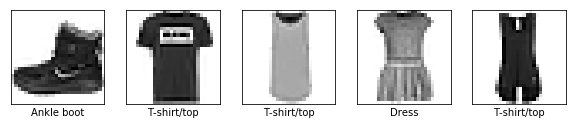

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_batch(train_images, train_labels,class_names,5)

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

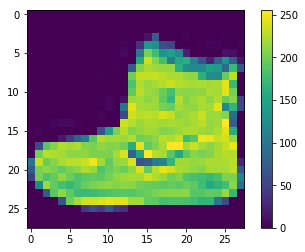

In [6]:
plot_single(train_images[0])

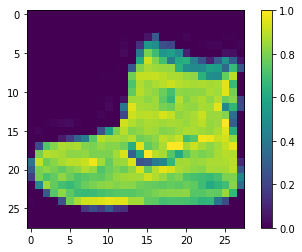

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plot_single(train_images[0])

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import tensorflow as tf

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer='normal'))

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
train_history = model.fit(train_images, train_labels, validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.7075 - acc: 0.7557 - val_loss: 0.4720 - val_acc: 0.8342
Epoch 2/10
 - 1s - loss: 0.4799 - acc: 0.8329 - val_loss: 0.4156 - val_acc: 0.8523
Epoch 3/10
 - 1s - loss: 0.4304 - acc: 0.8467 - val_loss: 0.3907 - val_acc: 0.8578
Epoch 4/10
 - 1s - loss: 0.4065 - acc: 0.8519 - val_loss: 0.3749 - val_acc: 0.8662
Epoch 5/10
 - 1s - loss: 0.3856 - acc: 0.8609 - val_loss: 0.3601 - val_acc: 0.8710
Epoch 6/10
 - 1s - loss: 0.3712 - acc: 0.8653 - val_loss: 0.3508 - val_acc: 0.8743
Epoch 7/10
 - 1s - loss: 0.3594 - acc: 0.8705 - val_loss: 0.3599 - val_acc: 0.8680
Epoch 8/10
 - 1s - loss: 0.3472 - acc: 0.8738 - val_loss: 0.3356 - val_acc: 0.8768
Epoch 9/10
 - 1s - loss: 0.3363 - acc: 0.8763 - val_loss: 0.3384 - val_acc: 0.8763
Epoch 10/10
 - 1s - loss: 0.3309 - acc: 0.8791 - val_loss: 0.3328 - val_acc: 0.8816


# 以圖形顯示訓練過程

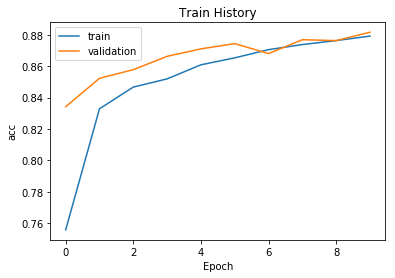

In [13]:
show_train_history(train_history,'acc','val_acc')

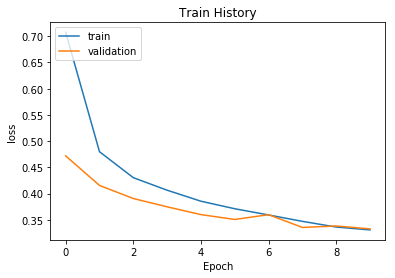

In [14]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 14us/step
Accuracy of testing data = 87.2%


# 進行預測

In [16]:
prediction=model.predict_classes(test_images)

In [17]:
prediction

array([9, 2, 1, ..., 8, 1, 5])

In [18]:
predictions = model.predict(test_images)
predictions[0]

array([1.7390299e-06, 2.0654021e-07, 4.1042335e-07, 5.6811911e-07,
       8.3460100e-07, 1.4869210e-02, 2.3577074e-06, 5.8100570e-02,
       4.1906143e-05, 9.2698222e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

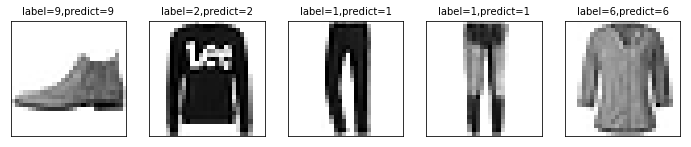

In [21]:
plot_images_labels_prediction(test_images,test_labels, prediction,idx=0,num=5)

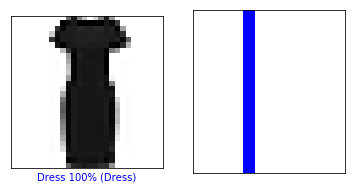

In [22]:
i = 1393
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images, class_names)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

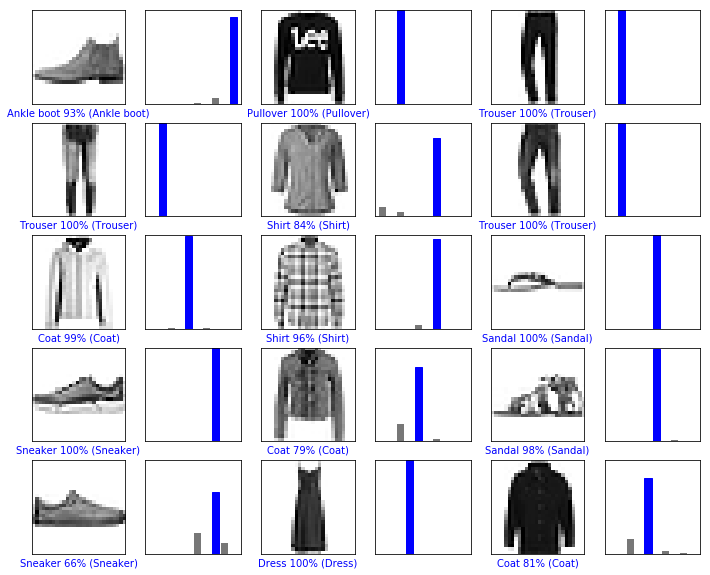

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# confusion matrix

In [24]:
import pandas as pd
pd.crosstab(test_labels,prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,856,1,23,13,3,0,93,0,11,0
1,4,966,0,20,6,0,2,0,2,0
2,11,0,825,6,110,0,43,0,5,0
3,43,9,16,838,53,0,36,0,5,0
4,0,1,107,15,827,0,46,0,4,0
5,1,0,0,0,0,945,0,36,2,16
6,158,2,126,25,89,0,580,0,20,0
7,0,0,0,0,0,16,0,972,0,12
8,5,0,1,2,5,2,4,4,977,0


In [25]:
df = pd.DataFrame({'label':test_labels, 'predict':prediction})
df[:2]

,label,predict
0,9,9
1,2,2


In [26]:
df[(df.label==3)&(df.predict==0)]

,label,predict
460,3,0
699,3,0
753,3,0
827,3,0
979,3,0
1336,3,0
2312,3,0
2347,3,0
2688,3,0
2721,3,0


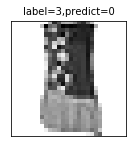

In [27]:
plot_images_labels_prediction(test_images,test_labels,prediction,idx=460,num=1)

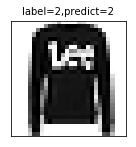

In [28]:
plot_images_labels_prediction(test_images,test_labels,prediction,idx=1,num=1)

# 針對位移過的圖進行預測

/usr/local/lib/python2.7/dist-packages/keras_preprocessing/image.py:1213: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/usr/local/lib/python2.7/dist-packages/keras_preprocessing/image.py:1437: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


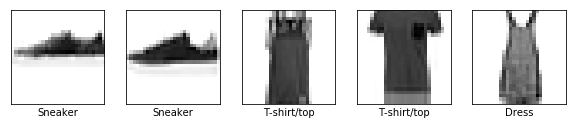

In [29]:
from util.my_plot import generate_shift_fashion_mnist_data

shift_img, shift_img_label = generate_shift_fashion_mnist_data(10000)
plot_batch(shift_img, shift_img_label,class_names,5)

In [30]:
scores = model.evaluate(shift_img, shift_img_label)
print("Accuracy of generated shift data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 13us/step
Accuracy of generated shift data = 65.7%
